In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [5]:
df= pd.read_csv("R:/YRANA/ML/DATASETS/Insurance_cost/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
X = df.drop(columns=['charges'], axis=1)
Y = df['charges']

Encode the data

In [66]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [67]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [68]:
numeric_transformer = StandardScaler()
OneHot = OneHotEncoder()

In [69]:
preprocessor = ColumnTransformer([
    ('OneHotEncoder', OneHot, cat_features),
    ('StandardScaler', numeric_transformer, num_features)
])
X = preprocessor.fit_transform(X)

Split the data

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

Evaluation function

In [73]:
def model_evaluation(y_true, y_predicted):
    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
    r2_square = r2_score(y_true, y_predicted)

    return mae, rmse, r2_square

Create and evaluate all models

In [74]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [75]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6066.0601
- Mean Absolute Error: 4185.1421
- R2 Score: 0.7477
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5960.0483
- Mean Absolute Error: 4068.6477
- R2 Score: 0.7620


Lasso
Model performance for Training set
- Root Mean Squared Error: 6065.2939
- Mean Absolute Error: 4168.8506
- R2 Score: 0.7478
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5956.6527
- Mean Absolute Error: 4052.0770
- R2 Score: 0.7623


Ridge
Model performance for Training set
- Root Mean Squared Error: 6065.3557
- Mean Absolute Error: 4173.4120
- R2 Score: 0.7478
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.3463
- Mean Absolute Error: 4056.8722
- R2 Score: 0.7623


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4820.7324
- Mean Absolute Error: 2913.6994


List down the results of all models as a table

In [76]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.858477
5,Random Forest Regressor,0.854869
6,XGBRegressor,0.811565
8,AdaBoost Regressor,0.805221
3,K-Neighbors Regressor,0.789717
1,Lasso,0.762315
2,Ridge,0.762260
0,Linear Regression,0.762044
4,Decision Tree,0.726988


Looking at the results of linear regressor

In [77]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 76.20


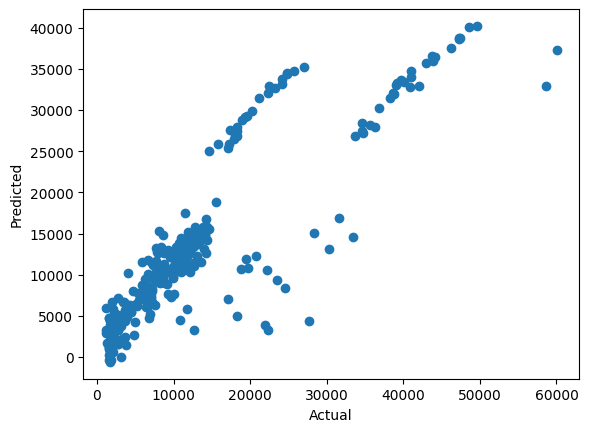

In [78]:
plt.scatter(Y_test,Y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

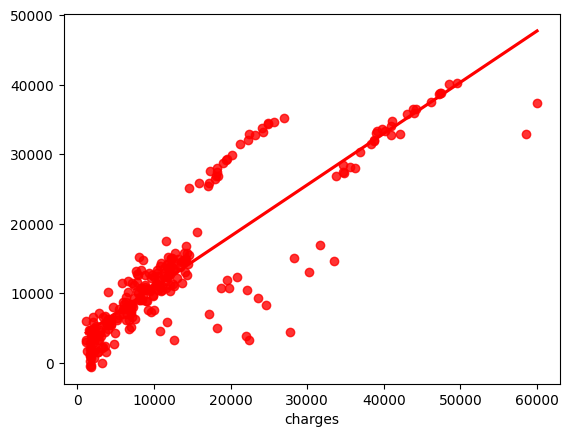

In [79]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red');

In [80]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
559,1646.42970,4432.0,-2785.57030
1087,11353.22760,12912.0,-1558.77240
1020,8798.59300,12640.0,-3841.40700
460,10381.47870,13328.0,-2946.52130
802,2103.08000,624.0,1479.08000
...,...,...,...
682,40103.89000,33360.0,6743.89000
629,42983.45850,35744.0,7239.45850
893,44202.65360,36480.0,7722.65360
807,2136.88225,5008.0,-2871.11775


Linear regressor is not performing exitingly well. However Adaboost Regressor done okay.